<a href="https://colab.research.google.com/github/BielSousa/br-classification-project/blob/master/classification_project_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [70]:
# seu código
!pip install ppscore

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv('https://raw.githubusercontent.com/BielSousa/br-classification-project/master/Churn_Modelling.csv')

In [ ]:
# seu código
churn.shape

(10000, 14)

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
churn['Exited'] = churn['Exited'].astype('object')
churn['HasCrCard'] = churn['HasCrCard'].astype('object')
churn['IsActiveMember'] = churn['IsActiveMember'].astype('object')


In [4]:
cats_var = ['Geography','Gender','IsActiveMember', 'HasCrCard','Exited']
nums_var = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [5]:
churn[nums_var].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

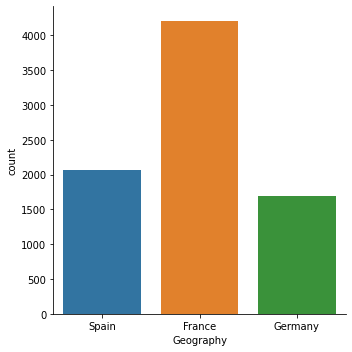

In [343]:
# Clientes que churnaram por nacionalidade
data = churn[['Geography','Exited']]
data = data[data['Exited'] == 0]
sns.catplot(x="Geography", kind="count", data=data)

In [ ]:
churn['Gender'].unique()

array(['Female', 'Male'], dtype=object)

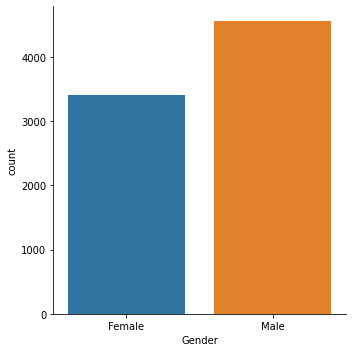

In [348]:
#Clientes que churnaram por Genero
data = churn[['Gender','Exited']]
data = data[data['Exited'] == 0]
sns.catplot(x='Gender',kind='count', data=data)

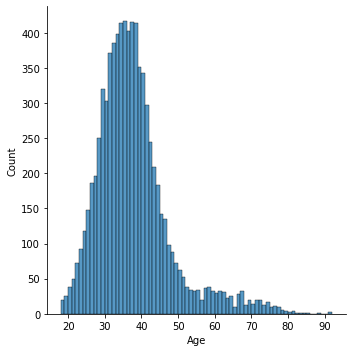

In [349]:
#Distribuição das idades dos clientes que churnaram 
data = churn[['Age','Exited']]
data = data[data['Exited'] == 0]
sns.displot(x="Age", kind="hist", data=data);

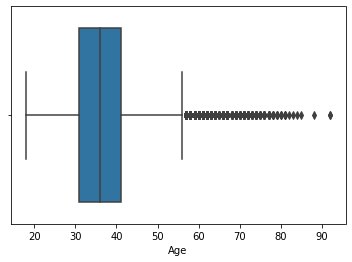

In [358]:
#Distribuição das idades dos clientes que churnaram 
data = churn[['Age','Exited']]
data = data[data['Exited'] == 0]
sns.boxplot(x="Age",data=data);

In [359]:
data.describe()

,Age
count,7963.000000
mean,37.408389
std,10.125363
min,18.000000
25%,31.000000
50%,36.000000
75%,41.000000
max,92.000000


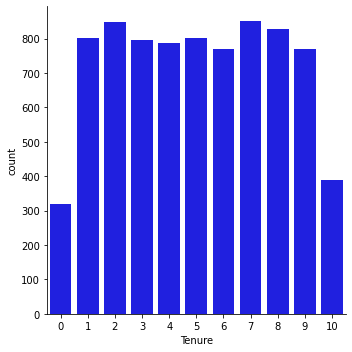

In [351]:
#Clientes que churnaram por anos que estavam no banco
data = churn[['Tenure','Exited']]
data = data[data['Exited'] == 0]
sns.catplot(x="Tenure",kind='count', data=data, color='blue');

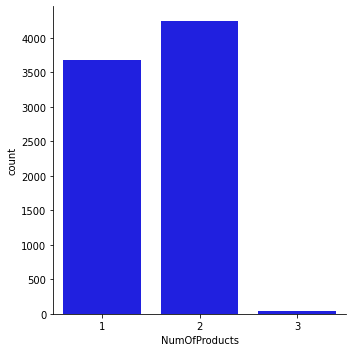

In [360]:
#Clientes que churnaram por numero de produtos
data = churn[['NumOfProducts','Exited']]
data = data[data['Exited'] == 0]
sns.catplot(x="NumOfProducts",kind='count', data=data, color='blue');

### Insights 

A maioria dos Clientes que churnaram eram:
*   Da França
*   São Homens
*   Em idade entre 31 e 41 anos
*   Tem entre 1 e 9 anos
*   Tem no máximo 2 produtos



### 3.2 Preparação e limpeza dos dados

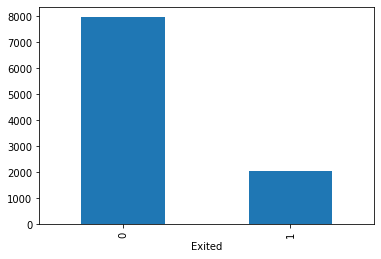

In [6]:
#Verificando balanceamento do target
churn.groupby('Exited')['Exited'].count().plot(kind='bar');

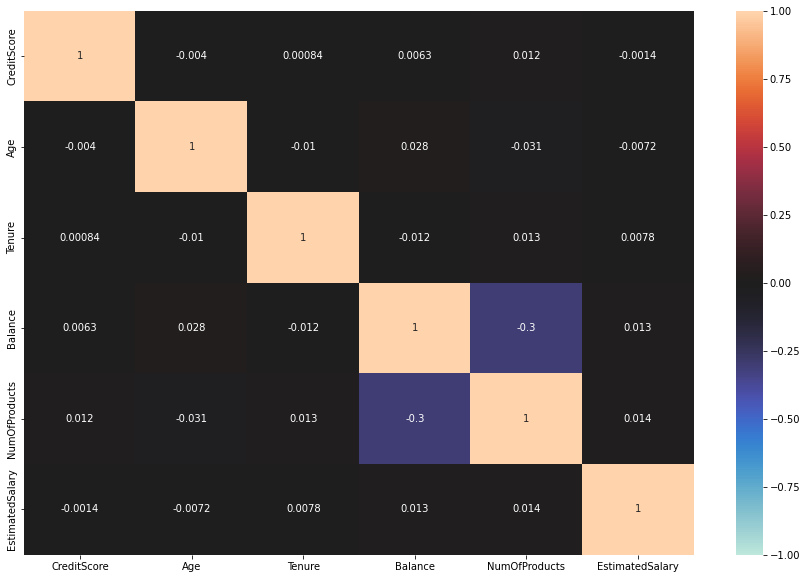

In [7]:
#Verificando correlações das variáveis numericas
plt.figure(figsize=(15,10))
sns.heatmap(churn[nums_var].corr(), annot=True,vmax=1, vmin=-1, center=0);

In [8]:
matriz = pps.matrix(churn)
matriz[matriz['y'] == 'Exited']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
13,RowNumber,Exited,0.000000e+00,classification,True,weighted F1,0.714155,0.676600,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
27,CustomerId,Exited,0.000000e+00,classification,True,weighted F1,0.714155,0.685497,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
41,Surname,Exited,0.000000e+00,classification,True,weighted F1,0.714155,0.706868,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
55,CreditScore,Exited,3.532747e-02,classification,True,weighted F1,0.714155,0.724253,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
69,Geography,Exited,1.434722e-07,classification,True,weighted F1,0.714155,0.714155,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
83,Gender,Exited,1.434722e-07,classification,True,weighted F1,0.714155,0.714155,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
97,Age,Exited,1.937302e-01,classification,True,weighted F1,0.714155,0.769532,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
111,Tenure,Exited,1.434722e-07,classification,True,weighted F1,0.714155,0.714155,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
125,Balance,Exited,0.000000e+00,classification,True,weighted F1,0.714155,0.706065,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
139,NumOfProducts,Exited,1.987491e-01,classification,True,weighted F1,0.714155,0.770966,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


### Insights 

Vemos que pelo pps as variáveis que menos explicam o target são EstimatedSalary e Balance entretanto ao aplicar os modelos verifiquei que obtive melhores resultados utilizando todas as variáveis.

### 3.3 Seleção de atributos

In [362]:
#Selecionando as variaveis a serem utilizadas
use_var =['Geography','Gender','CreditScore','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited','Balance','EstimatedSalary']
churn_f = churn[use_var]

In [363]:
#Verificando os tipos de variaveis
churn_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geography        10000 non-null  object 
 1   Gender           10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  object 
 7   IsActiveMember   10000 non-null  object 
 8   Exited           10000 non-null  object 
 9   Balance          10000 non-null  float64
 10  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


In [249]:
#Fazendo as transformações necessárias
ohe = OneHotEncoder()
churn_geo = ohe.fit_transform(churn_f['Geography'].values.reshape(-1,1)).toarray()
churn_geo = pd.DataFrame(churn_geo, columns=churn_f['Geography'].unique())
churn_gender = ohe.fit_transform(churn_f['Gender'].values.reshape(-1,1)).toarray()
churn_gender = pd.DataFrame(churn_gender, columns=churn_f['Gender'].unique())
churn_crcard = ohe.fit_transform(churn_f['HasCrCard'].values.reshape(-1,1)).toarray()
churn_crcard = pd.DataFrame(churn_crcard, columns=['HasCrCard','no_HasCrCard'])
churn_activemember = ohe.fit_transform(churn_f['IsActiveMember'].values.reshape(-1,1)).toarray()
churn_activemember = pd.DataFrame(churn_activemember, columns=['IsActiveMember','IsntActiveMember'])
churn_f.drop(columns=['Geography','Gender','HasCrCard','IsActiveMember'], inplace=True)
churn_final = pd.concat([churn_f, churn_geo,churn_gender,churn_crcard,churn_activemember], axis=1)
churn_final['Exited'] = churn_final['Exited'].astype('int64')

In [250]:
churn_final

,CreditScore,Age,Tenure,NumOfProducts,Exited,Balance,EstimatedSalary,France,Spain,Germany,Female,Male,HasCrCard,no_HasCrCard,IsActiveMember,IsntActiveMember
0,619,42,2,1,1,0.00,101348.88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,608,41,1,1,0,83807.86,112542.58,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,502,42,8,3,1,159660.80,113931.57,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,699,39,1,2,0,0.00,93826.63,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,850,43,2,1,0,125510.82,79084.10,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,2,0,0.00,96270.64,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
9996,516,35,10,1,0,57369.61,101699.77,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9997,709,36,7,1,1,0.00,42085.58,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9998,772,42,3,2,1,75075.31,92888.52,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [245]:
#Normalização  para Regressão logistica
churn_final_lr = churn_final
var_scaler = ['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']
scaler = MinMaxScaler()

for var in var_scaler:
    churn_final_lr[var] = scaler.fit_transform(churn_final_lr[var].values.reshape(-1,1))

In [246]:
churn_final_lr

,CreditScore,Age,Tenure,NumOfProducts,Exited,Balance,EstimatedSalary,France,Spain,Germany,Female,Male,HasCrCard,no_HasCrCard,IsActiveMember,IsntActiveMember
0,0.538,0.324324,0.2,0.000000,1,0.000000,0.506735,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.516,0.310811,0.1,0.000000,0,0.334031,0.562709,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.666667,1,0.636357,0.569654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.698,0.283784,0.1,0.333333,0,0.000000,0.469120,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.000000,0,0.500246,0.395400,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.333333,0,0.000000,0.481341,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
9996,0.332,0.229730,1.0,0.000000,0,0.228657,0.508490,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,1,0.000000,0.210390,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9998,0.844,0.324324,0.3,0.333333,1,0.299226,0.464429,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [251]:
# Separando as bases de treino e test
train, test = train_test_split(churn_final,test_size=0.2, random_state=0)
train_lr, test_lr = train_test_split(churn_final_lr,test_size=0.2, random_state=0)

In [252]:
#Aplicando o Oversampling com metodo SMOTE para balanceamento do target
smote = SMOTE()
x_train_over, x_test_over, y_train_over, y_test_over = train.drop(columns='Exited'),test.drop(columns='Exited'),train['Exited'],test['Exited']
x_train_over, y_train_over = smote.fit_sample(x_train_over, y_train_over)
x_train_over_lr, x_test_over_lr, y_train_over_lr, y_test_over_lr = train_lr.drop(columns='Exited'),test_lr.drop(columns='Exited'),train_lr['Exited'],test_lr['Exited']
x_train_over_lr, y_train_over_lr = smote.fit_sample(x_train_over_lr, y_train_over_lr)

### 3.4 Construção do modelo

In [335]:
LR = LogisticRegression(random_state = 2)
LR.fit(x_train_over_lr, y_train_over_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [331]:
DTC = DecisionTreeClassifier(random_state=3)
DTC.fit(x_train_over, y_train_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [312]:
GBC = GradientBoostingClassifier(random_state=2)
GBC.fit(x_train_over, y_train_over)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [306]:
RFC = RandomForestClassifier(random_state=11)
RFC.fit(x_train_over, y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

### 3.5 Avaliação do modelo

In [336]:
LR.score(x_test_over_lr, y_test_over_lr)

0.7055

In [332]:
DTC.score(x_test_over, y_test_over)

0.8075

In [313]:
GBC.score(x_test_over, y_test_over)

0.8615

In [307]:
RFC.score(x_test_over, y_test_over)

0.8675

### 3.4 Otimização do modelo

Vemos que com os métodos ensemble não precisamos otimizar o modelo.


*   Logistic Regression: 0.7055 (Linear)
*   Decission Tree Classifier: 0.8075 (tree)
*   Grandient Boosting Classifier: 0.8615 (Ensemble)
*   Random Forest Classifier: 0.8675 (Ensemble)



## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.